# Decision Tree

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.cluster import KMeans

In [ ]:
# Reading dataset
data = pd.read_csv('./onlinefraud.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,C1410794718,159929.0,155908.34,M1257036576,0.00,0.00,0
99996,10,PAYMENT,18345.49,C744303677,6206.0,0.00,M1785344556,0.00,0.00,0
99997,10,CASH_IN,183774.91,C104331851,39173.0,222947.91,C36392889,54925.05,0.00,0
99998,10,CASH_OUT,82237.17,C707662966,6031.0,0.00,C1553004158,592635.66,799140.46,0


# Preprocessing

In [ ]:
# Find columns with all unique data
unique_columns = data.columns[data.nunique() == len(data)]
print(unique_columns)

data.nameDest.value_counts


Index(['nameOrig'], dtype='object')


<bound method IndexOpsMixin.value_counts of 0        M1979787155
1        M2044282225
2         C553264065
3          C38997010
4        M1230701703
            ...     
99995    M1257036576
99996    M1785344556
99997      C36392889
99998    C1553004158
99999    M1419201886
Name: nameDest, Length: 100000, dtype: object>

In [ ]:
# Find the count of values in type column
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

## Labeling

In [ ]:
# Define a dictionary to map 'type' values to labels
label_type = {'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 2, 'DEBIT' : 3, 'CASH_IN' : 4 }

# Label the 'type' column
data['type'] = data['type'].map(label_type)

# Retrive only first letter of nameDest
data.nameDest = data['nameDest'].map(lambda x: x[0])

# Define a dictionary to map 'type' values to labels
label_nameDest = {'M': 0, 'C': 1 }

# Label the 'type' column
data['nameDest'] = data['nameDest'].map(label_nameDest)

# Remove nameOrig Column
data = data.drop('nameOrig', axis=1)

# Display the updated DataFrame
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,170136.0,160296.36,0,0.00,0.00,0
1,1,0,1864.28,21249.0,19384.72,0,0.00,0.00,0
2,1,1,181.00,181.0,0.00,1,0.00,0.00,1
3,1,2,181.00,181.0,0.00,1,21182.00,0.00,1
4,1,0,11668.14,41554.0,29885.86,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
99995,10,0,4020.66,159929.0,155908.34,0,0.00,0.00,0
99996,10,0,18345.49,6206.0,0.00,0,0.00,0.00,0
99997,10,4,183774.91,39173.0,222947.91,1,54925.05,0.00,0
99998,10,2,82237.17,6031.0,0.00,1,592635.66,799140.46,0


## Discretization

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

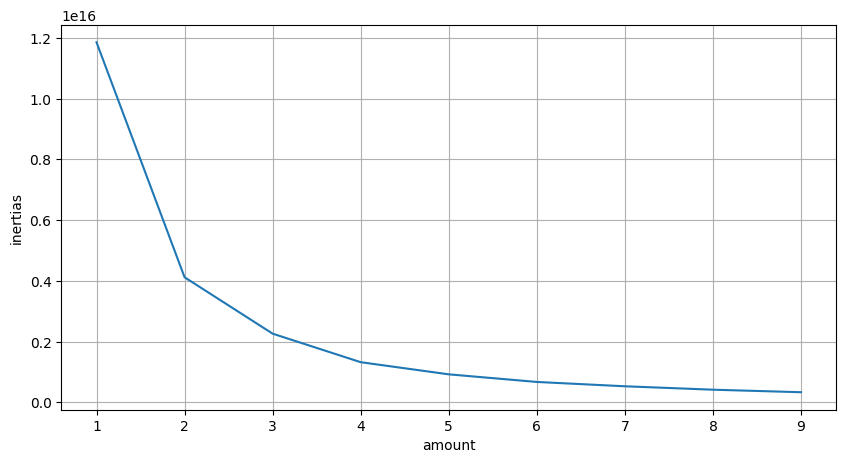

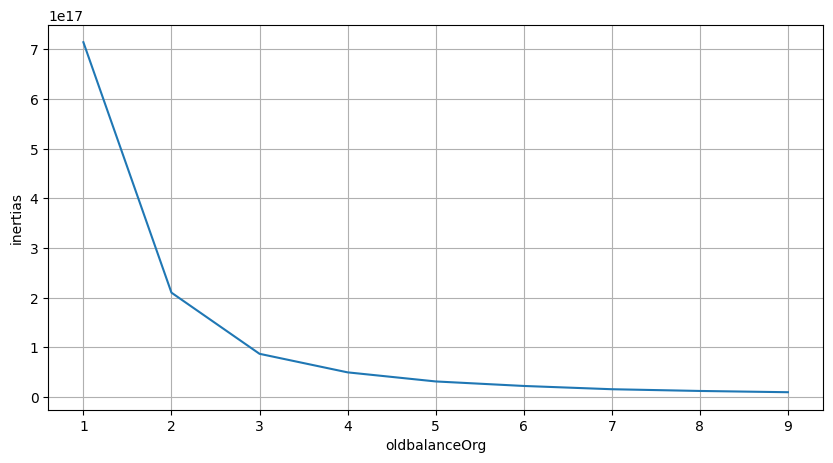

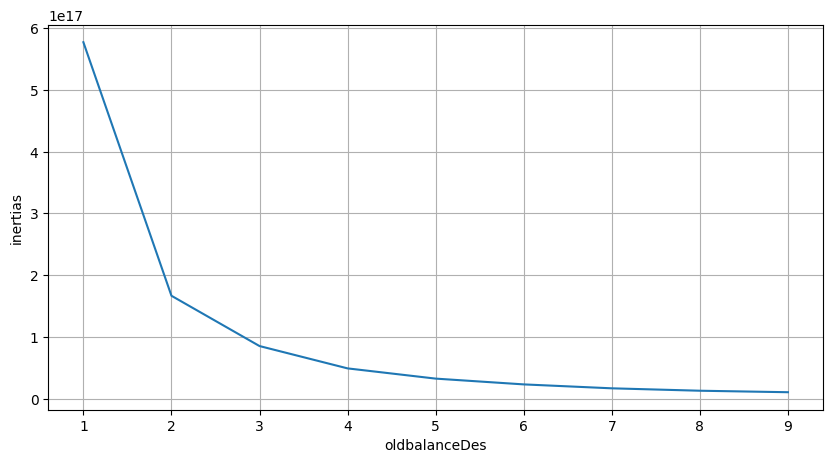

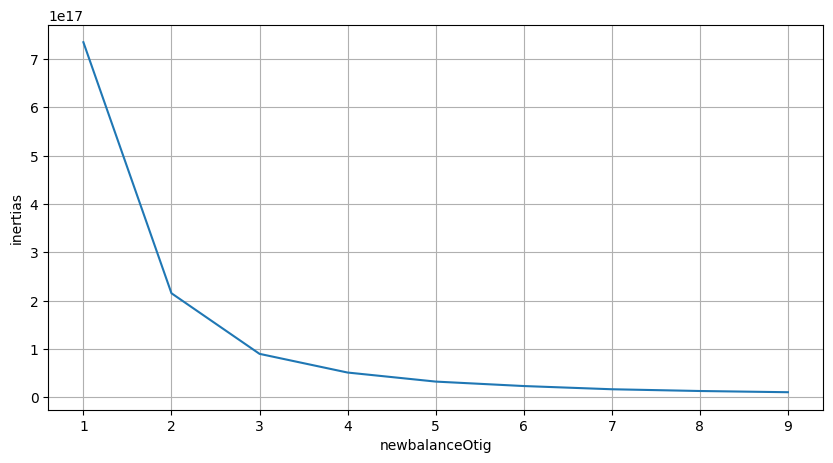

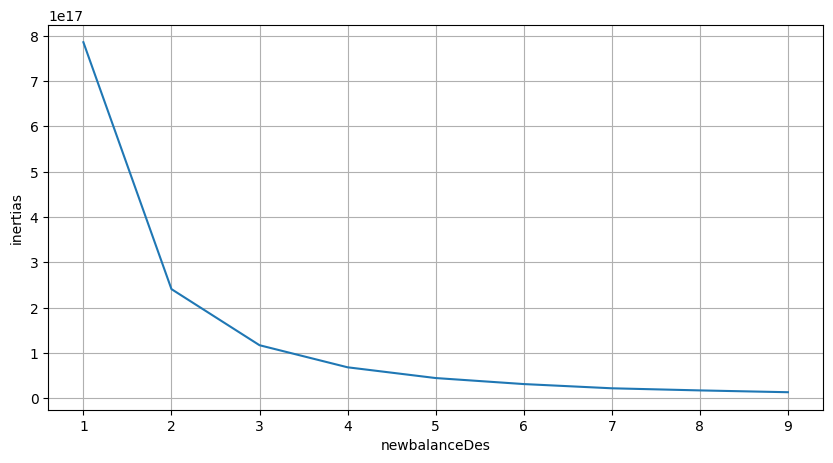

In [ ]:
# Discretization using K-mean clustering on amount and balances
# Find Optimum K-mean for each column
def optimizedK(data, max_k, name):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize = (10, 5))
    plt.plot(means, inertias)
    plt.xlabel(name)
    plt.ylabel('inertias')
    plt.grid(True)
    plt.show

amount = optimizedK(data[['amount', 'isFraud']], 10, 'amount')
oldBalanaceOrg = optimizedK(data[['oldbalanceOrg', 'isFraud']], 10, 'oldbalanceOrg')
oldBalanaceDes = optimizedK(data[['oldbalanceDest', 'isFraud']], 10, 'oldbalanceDes')
newBalanaceOrg = optimizedK(data[['newbalanceOrig', 'isFraud']], 10, 'newbalanceOtig')
newBalanaceDes = optimizedK(data[['newbalanceDest', 'isFraud']], 10, 'newbalanceDes')

In [ ]:
# Define the number of Clusters
Kmean = KMeans(n_clusters=4)

# Create a new DataFrame to store the k-mean values for analysis
km_df = pd.DataFrame()

# Add the results columns to new DataFrame
Kmean.fit(data[['amount', 'isFraud']])
km_df['amount_km'] = Kmean.labels_
Kmean.fit(data[['oldbalanceOrg', 'isFraud']])
km_df['oldbalanceOrg_km'] = Kmean.labels_
Kmean.fit(data[['newbalanceOrig', 'isFraud']])
km_df['newbalanceOrig_km'] = Kmean.labels_
Kmean.fit(data[['oldbalanceDest', 'isFraud']])
km_df['oldbalanceDest_km'] = Kmean.labels_
Kmean.fit(data[['newbalanceDest', 'isFraud']])
km_df['newbalanceDest_km'] = Kmean.labels_

# Display the new DataFrame
print(km_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

       amount_km  oldbalanceOrg_km  newbalanceOrig_km  oldbalanceDest_km  \
0              1                 0                  0                  0   
1              1                 0                  0                  0   
2              1                 0                  0                  0   
3              1                 0                  0                  0   
4              1                 0                  0                  0   
...          ...               ...                ...                ...   
99995          1                 0                  0                  0   
99996          1                 0                  0                  0   
99997          1                 0                  0                  0   
99998          1                 0                  0                  0   
99999          1                 0                  0                  0   

       newbalanceDest_km  
0                      0  
1                      0  
2     

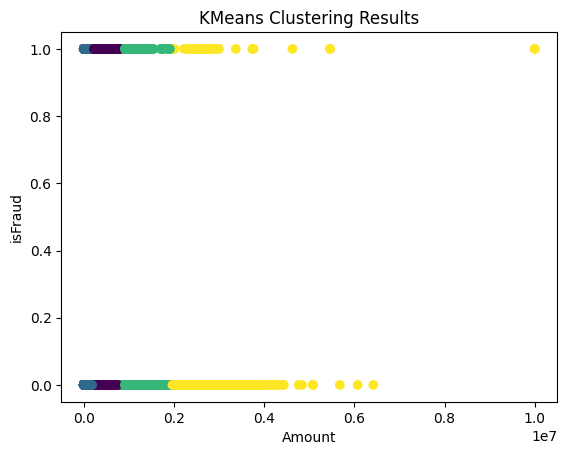

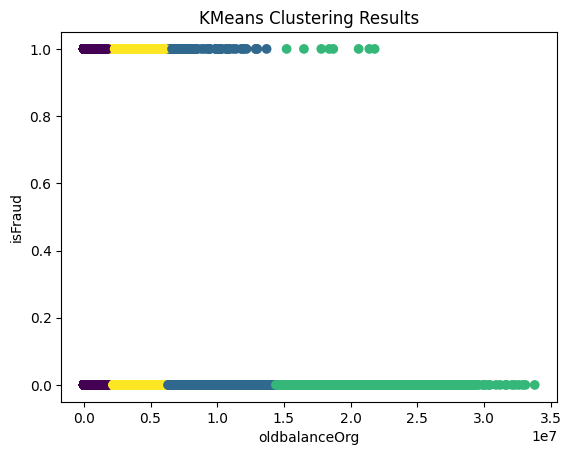

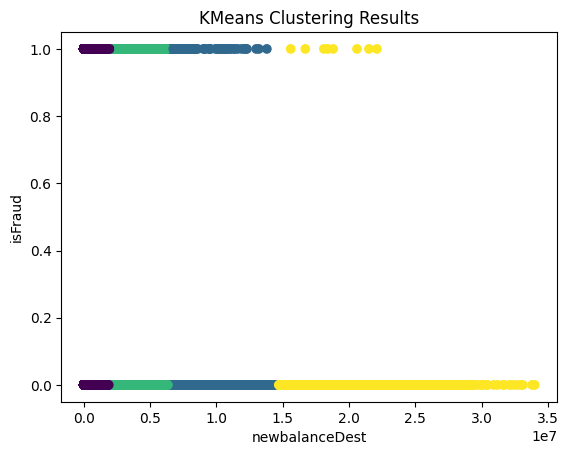

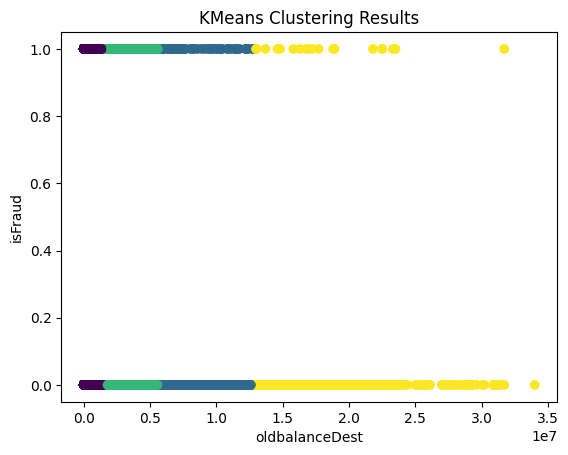

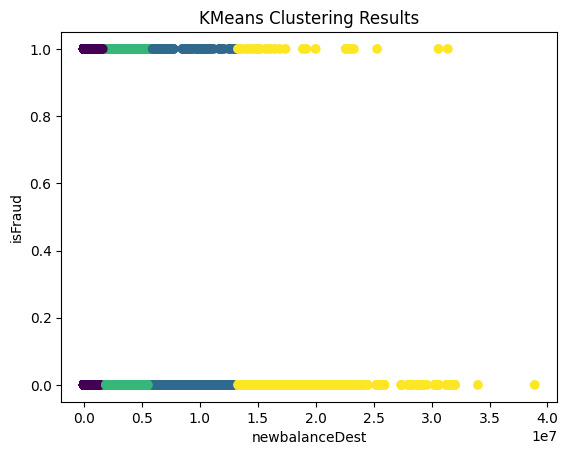

In [ ]:
# Create a scatter plot to visualize the KMeans clustering results
# Amount
plt.scatter(data['amount'], data['isFraud'], c=km_df['amount_km'], cmap='viridis')
plt.xlabel('Amount')
plt.ylabel('isFraud')
plt.title('KMeans Clustering Results')
plt.show()

# oldbalanceOrg
plt.scatter(data['oldbalanceOrg'], data['isFraud'], c=km_df['oldbalanceOrg_km'], cmap='viridis')
plt.xlabel('oldbalanceOrg')
plt.ylabel('isFraud')
plt.title('KMeans Clustering Results')
plt.show()

# newbalanceOrig
plt.scatter(data['newbalanceOrig'], data['isFraud'], c=km_df['newbalanceOrig_km'], cmap='viridis')
plt.xlabel('newbalanceDest')
plt.ylabel('isFraud')
plt.title('KMeans Clustering Results')
plt.show()

# oldbalanceDest
plt.scatter(data['oldbalanceDest'], data['isFraud'], c=km_df['oldbalanceDest_km'], cmap='viridis')
plt.xlabel('oldbalanceDest')
plt.ylabel('isFraud')
plt.title('KMeans Clustering Results')
plt.show()

#newbalanceDest
plt.scatter(data['newbalanceDest'], data['isFraud'], c=km_df['newbalanceDest_km'], cmap='viridis')
plt.xlabel('newbalanceDest')
plt.ylabel('isFraud')
plt.title('KMeans Clustering Results')
plt.show()

In [ ]:
# Replace the results columns
Kmean.fit(data[['amount', 'isFraud']])
data['amount'] = Kmean.labels_
Kmean.fit(data[['oldbalanceOrg', 'isFraud']])
data['oldbalanceOrg'] = Kmean.labels_
Kmean.fit(data[['newbalanceOrig', 'isFraud']])
data['newbalanceOrig'] = Kmean.labels_
Kmean.fit(data[['oldbalanceDest', 'isFraud']])
data['oldbalanceDest'] = Kmean.labels_
Kmean.fit(data[['newbalanceDest', 'isFraud']])
data['newbalanceDest'] = Kmean.labels_
data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,1
3,1,2,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
99995,10,0,0,0,0,0,0,0,0
99996,10,0,0,0,0,0,0,0,0
99997,10,4,0,0,0,1,0,0,0
99998,10,2,0,0,0,1,0,0,0


## Data Spliting


In [ ]:
# Assuming data is feature dataset
train, test = train_test_split(data, test_size=0.3, random_state=42)
# validation , test = train_test_split(test, test_size=0.5, random_state=42)

# Parameters:
# X: Feature dataset
# Spliting data based on small dataset's splitting standard (70:30)
# train: The proportion of the dataset to include in the train split (0.7 for 70%)
# test: The proportion of the dataset to include in the test split (0.5 for 15%)
# validation: The proportion of the dataset to include in the test split (0.5 for 15%)
# random_state: Controls the shuffling applied to the data before applying the split

# Print the shapes of the resulting datasets
print("train size:", train.shape)
print("test size:", test.shape)
# print("validation size:", validation.shape)


train size: (70000, 9)
test size: (30000, 9)


# Implmenet Decision Tree


## Classes & Functions

### Node


In [ ]:
class Node():
    def __init__(self, feature_index=None, info_gain=None, leaf_values=None, entropy=None, gini_index=None, value=None):
        # for decision cell
        self.feature_index = feature_index
        self.children = []
        self.info_gain = info_gain
        self.entropy = entropy
        self.gini_index = gini_index

        # for leaf cell
        self.leaf_values = leaf_values
        self.majority = None
        self.value = value

### Entropy


In [ ]:
def entropy(data):
    # calculate entropy of a list
    classes, counts = np.unique(data, return_counts=True)
    probabilities = counts / len(data)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

### Gini_Index

In [ ]:
def gini(data):
    # calculate Gini index of a list
    classes, counts = np.unique(data, return_counts=True)
    probabilities = counts / len(data)
    gini_index = 1 - np.sum(probabilities ** 2)
    return gini_index

### Tree


In [ ]:
# from colorama import Fore, Style
class tree():
    def __init__(self, labels, criterion='entropy', min_samples_split=4, max_depth=5):

        # initialize the root of the tree
        self.root = None

        # label of column
        self.labels = labels

        # criterion for tree construction
        self.criterion = criterion

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    # Define a method to determine the majority class in a dataset
    def set_majority(self, data):

        # Get unique values in the data
        types = data.unique()

        # Initialize variables to track the majority class and its count
        count = 0
        majority = None

        # Iterate through each unique value in the data
        for atype in types:
            # Check if the count of the current value is greater than the current majority count
            if len(data[data == atype]) > count:
                # Update the majority count and class if a new majority is found
                count = len(data[data == atype])
                majority = atype

        # Return the majority class found in the dataset
        return majority

    def build_tree(self, data, current_depth=0, parent_feature=None, value=None):
        if parent_feature:
            data.pop(parent_feature)

        # Determine the parent entropy and Gini index based on selected criterion
        Y = data[self.labels[-1]]
        if self.criterion == 'entropy':
            parent_metric = entropy(Y)
        elif self.criterion == 'gini':
            parent_metric = gini(Y)
        else:
            raise ValueError("Invalid Response! Enter 'entropy' or 'gini'")

        # Base cases for stopping recursion
        if current_depth >= self.max_depth or len(data) < self.min_samples_split or len(set(Y)) == 1:
            leaf_node = Node(leaf_values=Y, entropy=parent_metric, gini_index=parent_metric, value=value)
            leaf_node.majority = self.set_majority(Y)
            # leaf_node.isleaf = True
            return leaf_node

        # Find the best feature to split on
        bestFeature, information_gain = self.best_feature(data, parent_metric)

        # Create the decision node
        decision_node = Node(feature_index=bestFeature, info_gain=information_gain, entropy=parent_metric, gini_index=parent_metric, value=value)
        if current_depth == 0:
            self.root = decision_node

        # Recursively build child nodes for each unique value of the best feature
        for value in data[bestFeature].unique():
            child_data = data[data[bestFeature] == value]
            child_node = self.build_tree(child_data, current_depth + 1, bestFeature, value=value)
            decision_node.children.append(child_node)
            decision_node.set_majority = self.majority(Y)

        return decision_node

    # Define a method to determine the best feature for splitting based on information gain or Gini index
    def best_feature(self, data, parent_metric):
        # Extract features and target variable from the dataset
        X = data.iloc[:, :-1]
        features = X.columns
        Y = data.iloc[:, -1]

        # Initialize variables for tracking the best metric and its sum
        best_metric = float('inf') if self.criterion == 'entropy' else float('inf')
        metric_sum = 0

        # Iterate through each feature to calculate the metric and find the best feature
        for feature in features:
            clusters = data[feature].unique()
            for cluster in clusters:
                subset = data.groupby(feature).get_group(cluster)['isFraud']
                metric = entropy(subset) if self.criterion == 'entropy' else gini(subset)

                # Calculate the weighted sum of metrics based on the criterion
                if self.criterion == 'entropy':
                    metric_sum += metric * len(subset) / len(data)
                else:
                    metric_sum += metric

            # Update the best metric and best feature if a better split is found
            if metric_sum <= best_metric:
                best_metric = metric_sum
                best_feature = feature

        # Calculate information gain or Gini index based on the selected criterion
        information_gain = parent_metric - best_metric if self.criterion == 'entropy' else best_metric
        return best_feature, information_gain

    # Define a method to traverse the decision tree for prediction
    def traverse_tree(self, row):
        curr_node = self.root

        # Traverse the tree until a leaf node is reached
        while curr_node.children:
            feature_data = row[curr_node.feature_index]
            next_node = None

            # Check each child node based on feature value to determine the next node
            for child in curr_node.children:
                if child.value == feature_data:
                    next_node = child
                    break

            # Update the current node based on the next node or stop if no suitable child is found
            if next_node:
                curr_node = next_node
            else:
                break

        # Return the majority class of the leaf node as the prediction
        return curr_node.majority

    # Define a method to validate the decision tree model on new data
    def validate(self, data):
        # Extract the target variable and features from the validation data
        Y = data.iloc[:, -1]
        X = data.iloc[:, :-1]

        # Initialize an empty list to store predicted values
        predicted = []

        # Traverse the decision tree for each data point and make predictions
        for i in range(len(X)):
            predicted.append(self.traverse_tree(X.iloc[i, :]))

        # Convert the list of predictions to a Pandas Series for comparison
        predicted = pd.Series(predicted)

        # Reset the index of the target variable for accurate comparison
        Y = Y.reset_index(drop=True)

        # Calculate the accuracy of the predictions by comparing with the actual target values
        accuracy = (Y == predicted).mean()
        return accuracy

    def print_tree(self, node: Node, depth):
        print(Fore.BLUE + depth * "     " + (depth - 3) * "-", end=" " + Style.DIM + Style.RESET_ALL )
        if node.feature_index:
            print(("Feat:"), Fore.CYAN + node.feature_index + Style.RESET_ALL,
                  Fore.BLACK + "|" + Style.BRIGHT + Style.RESET_ALL,
                  "Info_Gain:", Fore.MAGENTA + str(round(node.info_gain,4)) + Style.BRIGHT + Style.RESET_ALL,
                  Fore.BLACK + "|" + Style.BRIGHT + Style.RESET_ALL,
                  "Entropy:", Fore.YELLOW + str(round(node.entropy,4)) + Style.BRIGHT + Style.RESET_ALL)
        else:
            print(Fore.RED + str(node.majority) + Style.BRIGHT + Style.RESET_ALL)
        for child in node.children:
            self.print_tree(child, depth + 1)
        if depth == 0:
            print('End')


### Build & Evaluate

In [ ]:
# Decision Tree Model Implementation

# Create a decision tree 't' using the 'entropy' or 'gini' criterion based on the columns of the training data
t = tree(train.columns, criterion='entropy')

# Build the decision tree using the training data
root = t.build_tree(train)

# Validate the built decision tree using the test data and calculate the accuracy of the prediction
result = t.validate(test)

# Display the accuracy of the prediction
print(f'The accuracy of the prediction was {result}')

The accuracy of the prediction was 0.9797


### Tree Display

In [ ]:
t.print_tree(root,4)

                    - Feat: step | Info_Gain: 0.5214 | Entropy: 0.0423
                         -- Feat: type | Info_Gain: 0.2094 | Entropy: 0.0403
                              --- Feat: amount | Info_Gain: 0.0421 | Entropy: 0.0421
                                   ---- Feat: oldbalanceOrg | Info_Gain: 0.054 | Entropy: 0.0421
                                        ----- Feat: newbalanceOrig | Info_Gain: 0.043 | Entropy: 0.043
                                             ------ 0
                                        ----- Feat: newbalanceOrig | Info_Gain: 0.0112 | Entropy: 0.011
                                             ------ 0
                                             ------ 0
                              --- Feat: amount | Info_Gain: 0.0742 | Entropy: 0.0375
                                   ---- Feat: oldbalanceOrg | Info_Gain: 0.1241 | Entropy: 0.0352
                                        ----- Feat: newbalanceOrig | Info_Gain: 0.0282 | Entropy: 0.0273
             

## Check the Results with Library

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

# Define the target variable
y = train['isFraud']

# Remove the target column from X
X_train = train.drop(columns=['isFraud'])

# Calculate entropy for the target variable
# target_entropy = entropy(y)
# print(f"Target Entropy: {target_entropy}")

# # Train the decision tree classifier
# clf = DecisionTreeClassifier()
# clf.fit(X_without_target, y)
d = data.drop(columns = ['isFraud'])
X_train, X_test, y_train, y_test = train_test_split(d, data['isFraud'], test_size=0.3, random_state=42)

# Create a Decision Tree Classifier with Gini criterion
clf = DecisionTreeClassifier(criterion='gini')
clf1 = DecisionTreeClassifier(criterion='entropy')
# Train the classifier on the training data
clf.fit(X_train, y_train)
clf1.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred1)

print("Accuracy based on Entropy criterion:", accuracy)
print("Accuracy based on gini criterion:", accuracy1)

# # Extract feature importances (information gain)
# feature_importances = clf.feature_importances_

# # Print the information gain for each feature
# for feature, importance in zip(X_without_target.columns, feature_importances):
#     print(f"Feature: {feature}, Information Gain: {importance}")



Accuracy based on Entropy criterion: 0.9797666666666667
Accuracy based on gini criterion: 0.9797666666666667
